<a href="https://colab.research.google.com/github/Alexcon19/Modelo-IA-Selecci-n-Fibra/blob/main/Actividad_DCA_2_Alexander_Leyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2023**
## **TEMA 1: Diseños completamente aleatorizados DCA**
### **1.1 Librerias básicas**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


### **Actividad DCA 2 - Alexander Leyton**
+ Se realizó una investigación para determinar la pérdida de nitrógeno por transpiración con varios niveles dietéticos de proteínas. En el experimento se utilizaron 16 hombres preadolescentes a quienes se les juzgó estar saludables.
+Cada muchacho estuvo sujeto a una de las cuatro dietas controladas en las cuales consumía 20, 45, 60 u 85 gramos de proteínas por día.
+Los siguientes datos representan la pérdida de nitrógeno del cuerpo a través de la transpiración, en miligramos, recabados durante los dos días últimos del periodo de experimentación:


| A=20 gramos | B=45 gramos | C=60 gramos | D=85 gramos |
|:-----------:|:-----------:|:-----------:|:-----------:|
|     190     |     210     |     318     |     390     |
|     180     |     240     |     295     |     321     |
|     200     |     250     |     270     |     396     |
|     210     |     235     |     380     |     399     |



# **a. Creando el DataFrame**

In [1]:
# **i. Reescribiendo el DataFrame**
Dieta = (['A']*4+['B']*4+['C']*4+['D']*4)
Dieta

['A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D']

In [7]:
Perdida = [190, 180, 200, 210, 210, 240, 250, 235, 318, 295, 270, 380, 390, 321, 396, 399]

In [8]:
DCA  = pd.DataFrame({'Dieta': Dieta, 'Perdida_N': Perdida})
DCA

,Dieta,Perdida_N
0,A,190
1,A,180
2,A,200
3,A,210
4,B,210
5,B,240
6,B,250
7,B,235
8,C,318
9,C,295


# **b. Analisis descriptivo de la variable**

In [9]:
# **j. Analisis descriptivo de la variable**
DCA.describe()

,Perdida_N
count,16.00000
mean,280.25000
std,78.31177
min,180.00000
25%,210.00000
50%,260.00000
75%,335.75000
max,399.00000


## **Promedio Pérdida de N y desviación típica por tipo de dieta**

In [10]:
## **Precio Desgaste y desviación típica por Tipo_Cuero**
DCA.groupby('Dieta')['Perdida_N'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Dieta,,,,
A,195.00,12.909944,180,210
B,233.75,17.017148,210,250
C,315.75,47.105378,270,380
D,376.50,37.188708,321,399


## **Cuartiles**

In [11]:
## **Cuartiles**
DCA.groupby('Dieta')['Perdida_N'].quantile([.10, .25, .50, .75, .90])

Dieta      
A      0.10    183.00
       0.25    187.50
       0.50    195.00
       0.75    202.50
       0.90    207.00
B      0.10    217.50
       0.25    228.75
       0.50    237.50
       0.75    242.50
       0.90    247.00
C      0.10    277.50
       0.25    288.75
       0.50    306.50
       0.75    333.50
       0.90    361.40
D      0.10    341.70
       0.25    372.75
       0.50    393.00
       0.75    396.75
       0.90    398.10
Name: Perdida_N, dtype: float64

# **c. BoxPlot para DCA**

<Axes: title={'center': 'Perdida_N vs Dieta'}, xlabel='Dieta', ylabel='Perdida_N'>

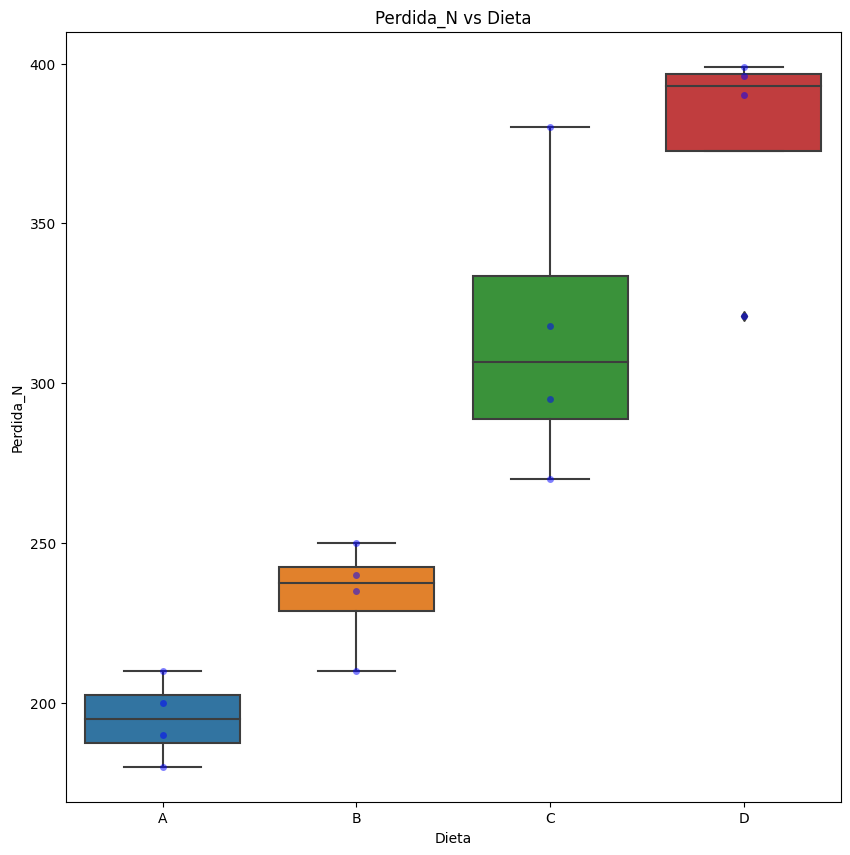

In [13]:
# **k. BoxPlot para DCA**
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Perdida_N vs Dieta')
sns.boxplot(x="Dieta", y=Perdida,data=DCA,ax=ax)
sns.swarmplot(x="Dieta", y="Perdida_N", data=DCA, color='blue', alpha=0.5, ax=ax)

# **d. Análisis de Varianza**

In [14]:
# **l. Análisis de Varianza**
modelDCA = ols("Perdida_N ~ Dieta", data = DCA).fit() #construimos el modelo
anova_result = sm.stats.anova_lm(modelDCA, typ=2)
print ('La Anova para el DCA es:')
print (anova_result)

La Anova para el DCA es:
           sum_sq    df          F    PR(>F)
Dieta     79816.5   3.0  26.224157  0.000015
Residual  12174.5  12.0        NaN       NaN


In [15]:
anova_result.T #Imprimir la ANOVA en forma de tabla

,Dieta,Residual
sum_sq,79816.500000,12174.5
df,3.000000,12.0
F,26.224157,NaN
PR(>F),0.000015,NaN


# **e. Análisis de Varianza2**

In [16]:
# **m. Análisis de Varianza2**
modeloDCA2 = smf.ols("Perdida_N ~ C(Dieta)", data = DCA).fit()
print(modeloDCA2.summary())


                            OLS Regression Results                            
Dep. Variable:              Perdida_N   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     26.22
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.48e-05
Time:                        14:56:57   Log-Likelihood:                -75.779
No. Observations:                  16   AIC:                             159.6
Df Residuals:                      12   BIC:                             162.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       195.0000     15.926     12.244

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **f. Análisis de Varianza3**

In [17]:
# **n. Análisis de Varianza3** No sirve para nada
modeloDCA3 = smf.ols("Perdida_N ~ C(Dieta)-1", data = DCA).fit()
print(modeloDCA3.summary())

                            OLS Regression Results                            
Dep. Variable:              Perdida_N   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     26.22
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.48e-05
Time:                        14:57:47   Log-Likelihood:                -75.779
No. Observations:                  16   AIC:                             159.6
Df Residuals:                      12   BIC:                             162.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(Dieta)[A]   195.0000     15.926     12.244      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **g. Comparaciones Múltiples**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,38.75,0.3556,-28.1176,105.6176,False
A,C,120.75,0.0008,53.8824,187.6176,True
A,D,181.5,0.0,114.6324,248.3676,True
B,C,82.0,0.0155,15.1324,148.8676,True
B,D,142.75,0.0002,75.8824,209.6176,True
C,D,60.75,0.0795,-6.1176,127.6176,False


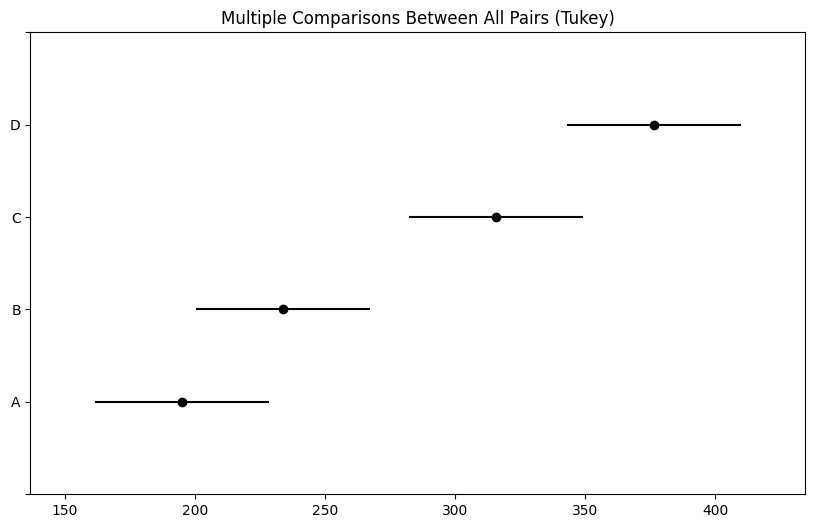

In [18]:
# **Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCA["Perdida_N"],     # Data
                          groups=DCA["Dieta"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **h. Normalidad de los Residuos: Shapiro Wilks y Gráfico de Probabilidad para los residuos**

## **Prueba Analítica con Shapiro**

In [20]:
# **Forma 1. Shapiro Wilks**
w, p_value= stats.shapiro(modelDCA.resid)
print ('Cual es el estadistico de Prueba para shapiro wilks w =', w)
print ('El valor p para el estadistico de prueba es p_value =', p_value)
print ('Para que se cumpla el supuesto de normalidad se debe cumplir que p_value =', f'{p_value}>0.05')

Cual es el estadistico de Prueba para shapiro wilks w = 0.9516265392303467
El valor p para el estadistico de prueba es p_value = 0.5158875584602356
Para que se cumpla el supuesto de normalidad se debe cumplir que p_value = 0.5158875584602356>0.05


In [21]:
DCA['Perdida_N'].describe()

count     16.00000
mean     280.25000
std       78.31177
min      180.00000
25%      210.00000
50%      260.00000
75%      335.75000
max      399.00000
Name: Perdida_N, dtype: float64

## **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Todos los datos**

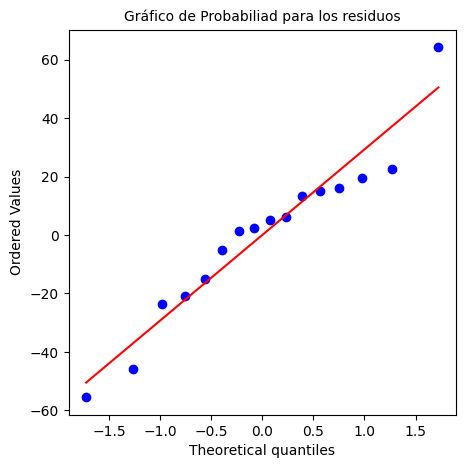

In [22]:
# **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modelDCA.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por secciones**

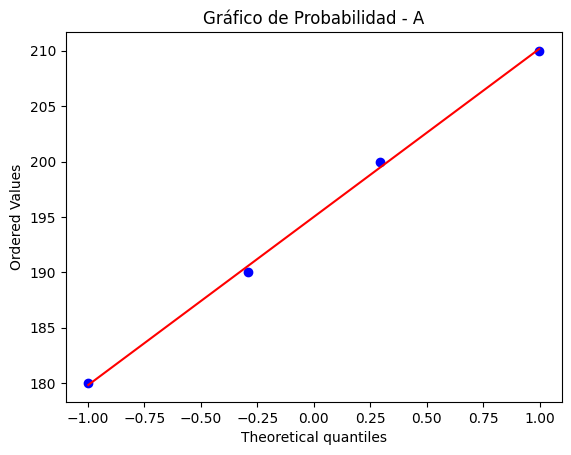

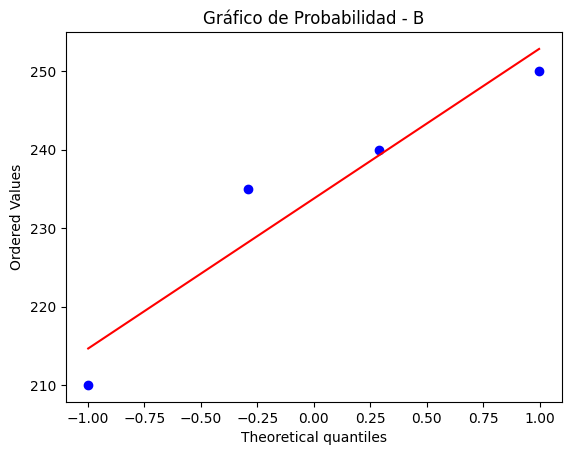

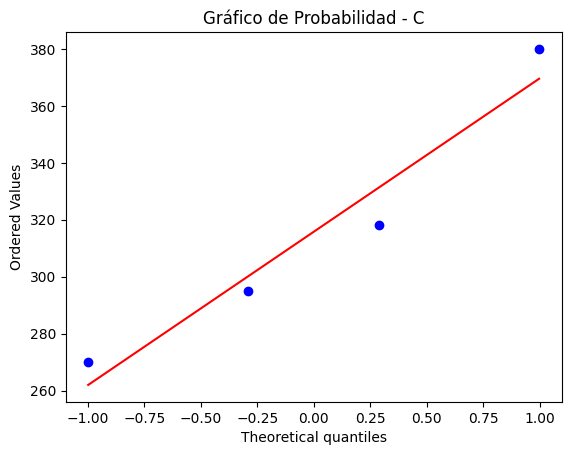

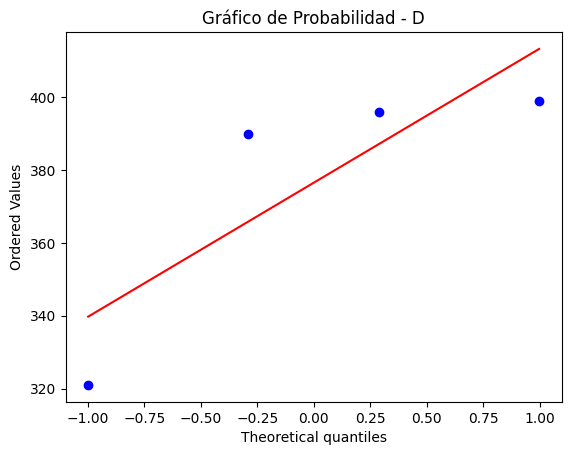

In [23]:
unique_Dieta= DCA['Dieta'].unique()
for Dieta in unique_Dieta:
    stats.probplot(DCA[DCA['Dieta'] == Dieta]['Perdida_N'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+Dieta)
    plt.show()

In [24]:
Perdida_N =modelDCA.resid
Perdida_N
Perdida_N.describe()

count    1.600000e+01
mean    -7.815970e-14
std      2.848918e+01
min     -5.550000e+01
25%     -1.643750e+01
50%      3.625000e+00
75%      1.531250e+01
max      6.425000e+01
dtype: float64

In [25]:
Perdida_N

0     -5.00
1    -15.00
2      5.00
3     15.00
4    -23.75
5      6.25
6     16.25
7      1.25
8      2.25
9    -20.75
10   -45.75
11    64.25
12    13.50
13   -55.50
14    19.50
15    22.50
dtype: float64

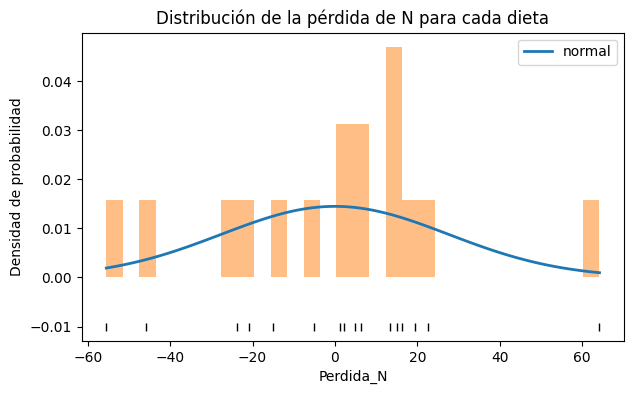

In [27]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(Perdida_N)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Perdida_N), max(Perdida_N), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Perdida_N, density=True, bins=30,  alpha=0.5)
ax.plot(Perdida_N, np.full_like(Perdida_N, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de la pérdida de N para cada dieta')
ax.set_xlabel('Perdida_N')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

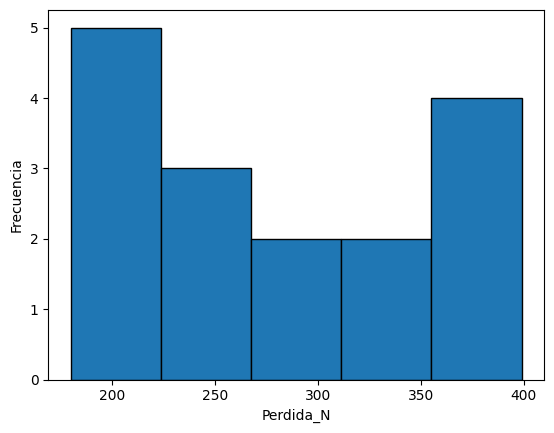

In [28]:
# **Histograma de Residuos**
plt.hist(DCA['Perdida_N'], bins='auto', histtype='bar', ec='k')

plt.xlabel("Perdida_N")
plt.ylabel('Frecuencia')
plt.show()

# **Histograma de Residuos**

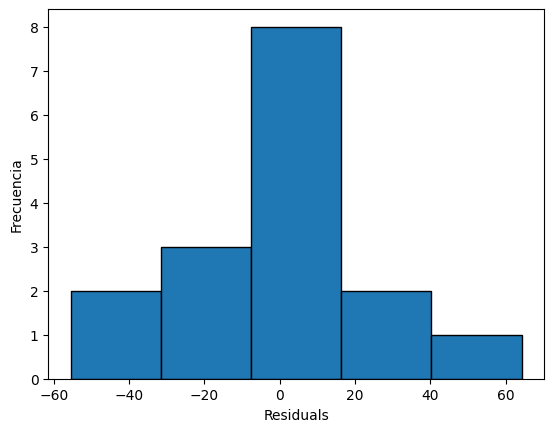

In [29]:
# **Histograma de Residuos**
plt.hist(modelDCA.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals")
plt.ylabel('Frecuencia')
plt.show()

# **Gráfico Q-Q**

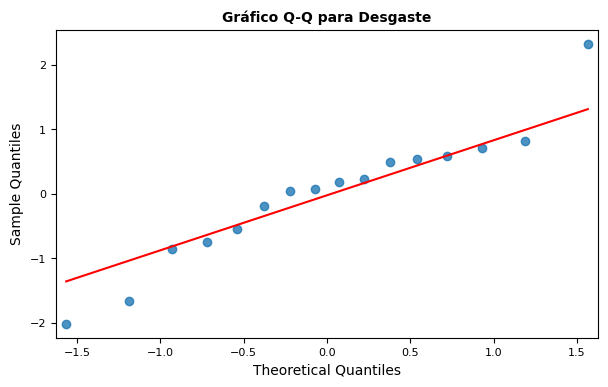

In [30]:
# **Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    Perdida_N,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Desgaste', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

# **i. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [31]:
# q. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(DCA['Perdida_N'][DCA['Dieta'] == 'A'],
             DCA['Perdida_N'][DCA['Dieta'] == 'B'],
             DCA['Perdida_N'][DCA['Dieta'] == 'C'],
             DCA['Perdida_N'][DCA['Dieta'] == 'D'] )

LeveneResult(statistic=0.8477053048177182, pvalue=0.4940249142615841)